# Read & Plot Time Series Data

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from patsy import dmatrices
from pandas import Series
from matplotlib import pyplot
from datetime import datetime
from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

# Read yearly time series: USGDP

In [3]:
USGDP = pd.read_csv('GDPUS.csv', header=0)
USGDP.head(8)

,Year,GDP
0,1929,821.8
1,1930,748.9
2,1931,691.3
3,1932,599.7
4,1933,587.1
5,1934,632.6
6,1935,681.6
7,1936,777.9


In [4]:
USGDP.tail(5)

,Year,GDP
58,1987,4718.6
59,1988,4784.6
60,1989,4739.2
61,1990,4822.3
62,1991,4835.0


In [5]:
date_rng = pd.date_range(start='1/1/1929', end='31/12/1991', freq='Y')
date_rng

DatetimeIndex(['1929-12-31', '1930-12-31', '1931-12-31', '1932-12-31',
               '1933-12-31', '1934-12-31', '1935-12-31', '1936-12-31',
               '1937-12-31', '1938-12-31', '1939-12-31', '1940-12-31',
               '1941-12-31', '1942-12-31', '1943-12-31', '1944-12-31',
               '1945-12-31', '1946-12-31', '1947-12-31', '1948-12-31',
               '1949-12-31', '1950-12-31', '1951-12-31', '1952-12-31',
               '1953-12-31', '1954-12-31', '1955-12-31', '1956-12-31',
               '1957-12-31', '1958-12-31', '1959-12-31', '1960-12-31',
               '1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
               '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31',
               '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
      

In [6]:
USGDP['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
USGDP.head(8)

,Year,GDP,TimeIndex
0,1929,821.8,1929-12-31
1,1930,748.9,1930-12-31
2,1931,691.3,1931-12-31
3,1932,599.7,1932-12-31
4,1933,587.1,1933-12-31
5,1934,632.6,1934-12-31
6,1935,681.6,1935-12-31
7,1936,777.9,1936-12-31


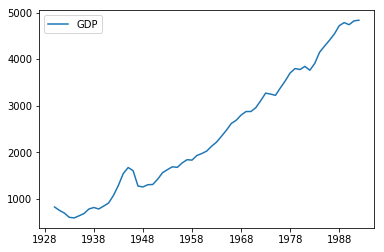

In [6]:
plt.plot(USGDP.TimeIndex, USGDP.GDP)
plt.legend(loc='best')
#pyplot.show()

In [7]:
gdplog = np.log10(USGDP.GDP)
gdplog.dropna(inplace=True)

gdplog_diff = gdplog.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
gdplog_diff.dropna(inplace=True)

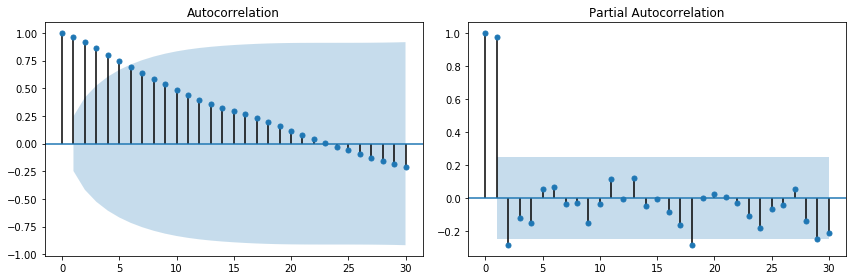

In [11]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(gdplog, lags=30, ax=axes[0])
smt.graphics.plot_pacf(gdplog, lags=30, ax=axes[1]) # Partial Autocorrelation
plt.tight_layout()

# Task 1: Read GDP India series

In [7]:
IndiaGDP = pd.read_csv('GDPIndia.csv', header=0)
date_rng = pd.date_range(start='1/1/1960', end='31/12/2017', freq='Y')
IndiaGDP['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
IndiaGDP.head()

,Year,GDPpercapita,TimeIndex
0,1960,81.284764,1960-12-31
1,1961,84.426437,1961-12-31
2,1962,88.914919,1962-12-31
3,1963,100.048592,1963-12-31
4,1964,114.315161,1964-12-31


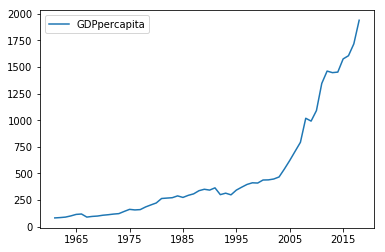

In [8]:
plt.plot(IndiaGDP.TimeIndex, IndiaGDP.GDPpercapita)
plt.legend(loc='best')
pyplot.show()

# Task 2: Read English Daily Wage series

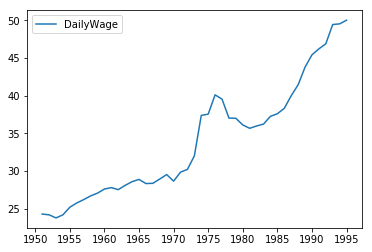

In [9]:
EngWage = pd.read_csv('EngWage.csv', header=0)
date_rng = pd.date_range(start='1/1/1950', end='31/12/1994', freq='Y')
EngWage['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
EngWage.head()
plt.plot(EngWage.TimeIndex, EngWage.DailyWage)
plt.legend(loc='best')
pyplot.show()

# Read Quarterly Time Series: Retail Turnover

In [10]:
Turnover = pd.read_csv('RetailTurnover.csv')
#Turnover.head()

In [11]:
from datetime import datetime
date_rng = pd.date_range(start='1/7/1982', end='31/3/1992', freq='Q')

In [12]:
date_rng

DatetimeIndex(['1982-03-31', '1982-06-30', '1982-09-30', '1982-12-31',
               '1983-03-31', '1983-06-30', '1983-09-30', '1983-12-31',
               '1984-03-31', '1984-06-30', '1984-09-30', '1984-12-31',
               '1985-03-31', '1985-06-30', '1985-09-30', '1985-12-31',
               '1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31',
               '1990-03-31', '1990-06-30', '1990-09-30', '1990-12-31',
               '1991-03-31', '1991-06-30', '1991-09-30', '1991-12-31',
               '1992-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [13]:
Turnover['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
Turnover.head()

,Year,Quarter,Turnover,TimeIndex
0,1982,Q3,13423.2,1982-03-31
1,1982,Q4,13128.8,1982-06-30
2,1983,Q1,15398.8,1982-09-30
3,1983,Q2,12964.2,1982-12-31
4,1983,Q3,13133.5,1983-03-31


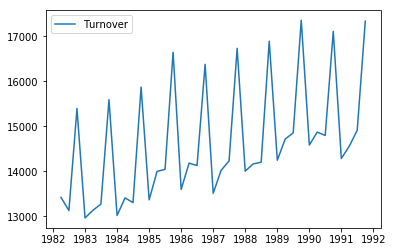

In [14]:
plt.plot(Turnover.TimeIndex, Turnover.Turnover)
plt.legend(loc='best')
pyplot.show()

# Task 3: Read Portugal Port Series

In [15]:
PortPax = pd.read_csv('PortugalPort.csv')
PortPax.head()

,Year,Quarter,Pax
0,2000,Q1,21
1,2000,Q2,61
2,2000,Q3,119
3,2000,Q4,30
4,2001,Q1,16


In [16]:
date_rng = pd.date_range(start='1/1/2000', end='31/12/2017', freq='Q')
#date_rng

In [17]:
PortPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
PortPax.head()

,Year,Quarter,Pax,TimeIndex
0,2000,Q1,21,2000-03-31
1,2000,Q2,61,2000-06-30
2,2000,Q3,119,2000-09-30
3,2000,Q4,30,2000-12-31
4,2001,Q1,16,2001-03-31


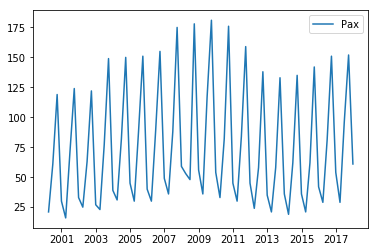

In [18]:
plt.plot(PortPax.TimeIndex, PortPax.Pax)
plt.legend(loc='best')
pyplot.show()

# Task 4: Read Petrol Consumption Series

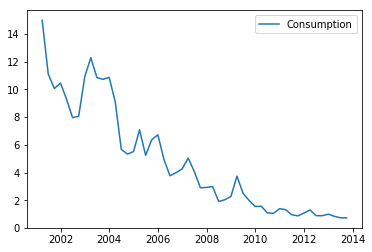

In [19]:
Petrol = pd.read_csv('Petrol.csv')
Petrol.head()
date_rng = pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
#date_rng
Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
Petrol.head()
plt.plot(Petrol.TimeIndex, Petrol.Consumption)
plt.legend(loc='best')
pyplot.show()

# Read Monthly Time Series: Average Monthly Temperature

In [20]:
AirTemp = pd.read_csv('AirTemp.csv')
#AirTemp.head()

In [21]:
date_rng = pd.date_range(start='1/1/1920', end='31/12/1939', freq='M')
#date_rng

In [22]:
AirTemp['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
AirTemp.head()

,Year,Month,AvgTemp,TimeIndex
0,1920,Jan,40.6,1920-01-31
1,1920,Feb,40.8,1920-02-29
2,1920,Mar,44.4,1920-03-31
3,1920,Apr,46.7,1920-04-30
4,1920,May,54.1,1920-05-31


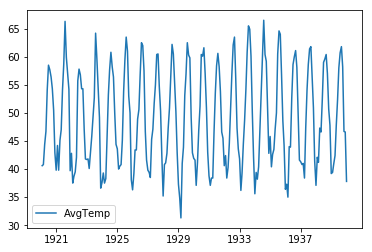

In [23]:
plt.plot(AirTemp.TimeIndex, AirTemp.AvgTemp)
plt.legend(loc='best')
pyplot.show()

# Task 5: Read Champagne Series

In [24]:
Champ = pd.read_csv('Champagne.csv')
Champ.head()

,Year,Month,Sales
0,1964,Jan,2815
1,1964,Feb,2672
2,1964,Mar,2755
3,1964,Apr,2721
4,1964,May,2946


In [25]:
date_rng = pd.date_range(start='1/1/1964', end='30/9/1972', freq='M')
date_rng
Champ['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
Champ.head()

,Year,Month,Sales,TimeIndex
0,1964,Jan,2815,1964-01-31
1,1964,Feb,2672,1964-02-29
2,1964,Mar,2755,1964-03-31
3,1964,Apr,2721,1964-04-30
4,1964,May,2946,1964-05-31


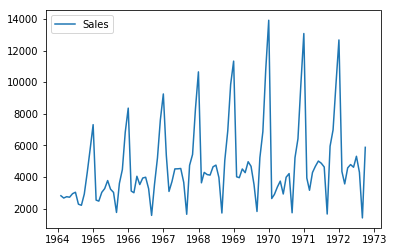

In [26]:
plt.plot(Champ.TimeIndex, Champ.Sales)
plt.legend(loc='upper left')
pyplot.show()

# Task 6: Read International Air Passengers Data

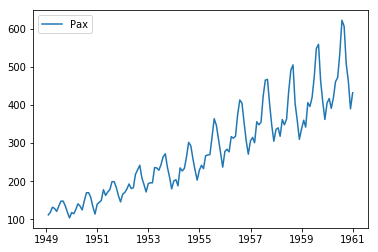

In [27]:
AirPax = pd.read_csv('AirPax.csv')
AirPax.head()
date_rng = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
date_rng
AirPax['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
AirPax.head()
plt.plot(AirPax.TimeIndex, AirPax.Pax)
plt.legend(loc='best')
pyplot.show()

# Task 7: Read Tractor Sales Series

In [28]:
Tractor = pd.read_csv("TractorSales.csv")
Tractor.head(5)

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [29]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(Tractor))

In [30]:
import calendar
Tractor['Month'] = dates.month
Tractor['Month'] = Tractor['Month'].apply(lambda x: calendar.month_abbr[x])
Tractor['Year'] = dates.year

In [31]:
#Tractor.drop(['Month-Year'], axis=1, inplace=True)
Tractor.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
Tractor = Tractor[['Month', 'Year', 'Tractor-Sales']]

In [32]:
Tractor.set_index(dates, inplace=True)

In [33]:
Tractor.head(5)

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [34]:
# extract out the time-series
sales_ts = Tractor['Tractor-Sales']

Text(0,0.5,'Tractor Sales')

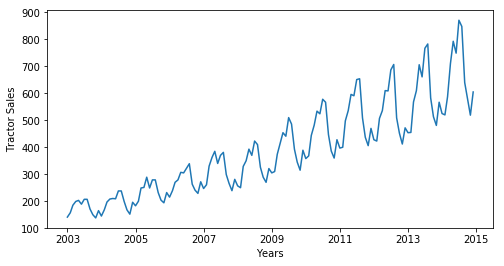

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

# Task 8: Read Environmental CO2 Emission Series

Text(0,0.5,'CO2 Emission')

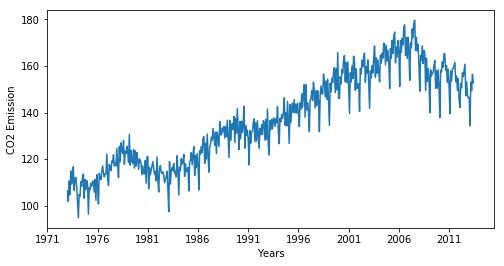

In [36]:
Emission = pd.read_csv("Emission.csv")
Emission.head(5)
dates = pd.date_range(start='1973-01-01', freq='MS', periods=len(Emission))
Emission['Month'] = dates.month
Emission['Month'] = Emission['Month'].apply(lambda x: calendar.month_abbr[x])
Emission['Year'] = dates.year
Emission.set_index(dates, inplace=True)
Emission.rename(columns={'CO2 Emission':'CO2-Emission'}, inplace=True)
Emission.head(5)
plt.figure(figsize=(8, 4))
Emission_ts = Emission['CO2-Emission']
plt.plot(Emission_ts)
plt.xlabel('Years')
plt.ylabel('CO2 Emission')

# Task 9: Reading Retal Food Sales Series

In [37]:
RetailFood = pd.read_csv("RetailFood.csv")
RetailFood.head(5)

,Year,Month,Food
0,1992,Jan,164083
1,1992,Feb,164260
2,1992,Mar,163747
3,1992,Apr,164759
4,1992,May,165617


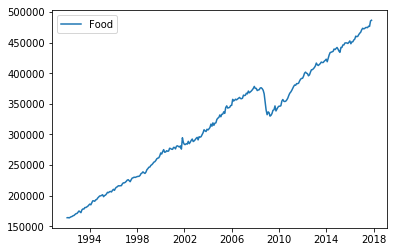

In [38]:
date_rng = pd.date_range(start='1/1/1992', end='31/10/2017', freq='M')
dates = pd.date_range(start='1992-01-01', freq='MS', periods=len(RetailFood))
date_rng
RetailFood['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
RetailFood.head()
plt.plot(RetailFood.TimeIndex, RetailFood.Food)
plt.legend(loc='best')
pyplot.show()

# Task 10: Reading Mauna Loa Emission Series

In [39]:
MaunaLoa = pd.read_csv("MaunaLoa.csv")
MaunaLoa.head(5)

,Year,Month,CO2 ppm
0,1965,Jan,319.32
1,1965,Feb,320.36
2,1965,Mar,320.82
3,1965,Apr,322.06
4,1965,May,322.17


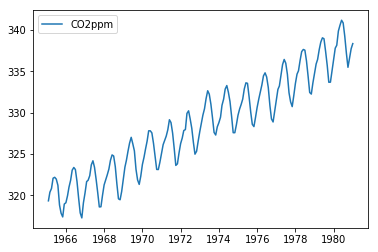

In [40]:
date_rng = pd.date_range(start='1/1/1965', end='31/12/1980', freq='M')
date_rng
MaunaLoa['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])
MaunaLoa.rename(columns={'CO2 ppm':'CO2ppm'}, inplace=True)
MaunaLoa.head()
plt.plot(MaunaLoa.TimeIndex, MaunaLoa.CO2ppm)
plt.legend(loc='best')
pyplot.show()

# Reading Weekly Time Series: Dow Jones Closing

In [41]:
DJI = pd.read_csv("WeeklyClosing.csv")
DJI.head(5)

,Week,Closing
0,1971-07-05,890.19
1,1971-07-12,901.80
2,1971-07-19,888.51
3,1971-07-26,887.78
4,1971-08-02,858.43


In [42]:
date_rng = pd.date_range(start='7/4/1971', end='8/5/1974', freq='W')
DJI['TimeIndex'] = pd.DataFrame(date_rng, columns=['Week'])
DJI.rename(columns={'DJIA Closing':'Closing'}, inplace=True)
DJI.head()

,Week,Closing,TimeIndex
0,1971-07-05,890.19,1971-07-04
1,1971-07-12,901.80,1971-07-11
2,1971-07-19,888.51,1971-07-18
3,1971-07-26,887.78,1971-07-25
4,1971-08-02,858.43,1971-08-01


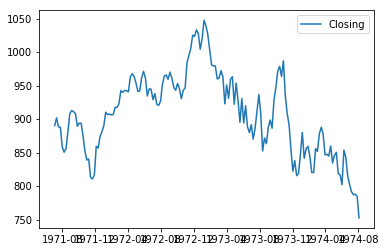

In [43]:
plt.plot(DJI.TimeIndex, DJI.Closing)
plt.legend(loc='best')
pyplot.show()

# Task 11: Reading Gasoline Price Data

In [44]:
Gasoline = pd.read_csv("Gasoline.csv")
Gasoline.head(5)

,Week,Gas Price
0,2000-06-04,1.766
1,2000-06-11,1.804
2,2000-06-18,1.845
3,2000-06-25,1.859
4,2000-07-02,1.867


In [45]:
date_rng = pd.date_range(start='6/4/2000', end='11/26/2012', freq='W')
Gasoline['TimeIndex'] = pd.DataFrame(date_rng, columns=['Week'])
Gasoline.rename(columns={'Gas Price':'GasPrice'}, inplace=True)
Gasoline.head()

,Week,GasPrice,TimeIndex
0,2000-06-04,1.766,2000-06-04
1,2000-06-11,1.804,2000-06-11
2,2000-06-18,1.845,2000-06-18
3,2000-06-25,1.859,2000-06-25
4,2000-07-02,1.867,2000-07-02


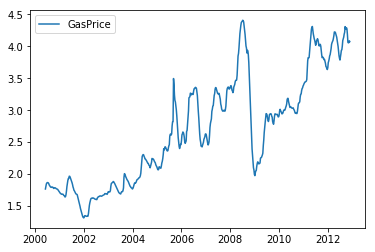

In [46]:
plt.plot(Gasoline.TimeIndex, Gasoline.GasPrice)
plt.legend(loc='best')
pyplot.show()

# Read Week-Day Time Series: Crude Oil Production

In [47]:
CrdOil = pd.read_csv('CrudeOil.csv')
CrdOil.head()

,Date,Weekday,Price
0,1983-04-04,2,29.44
1,1983-04-05,3,29.71
2,1983-04-06,4,29.92
3,1983-04-07,5,30.17
4,1983-04-08,6,30.38


In [48]:
date_rng = pd.date_range(start='4/4/1983', end='27/11/2012', freq='B')
#date_rng

In [49]:
CrdOil['TimeIndex'] = pd.DataFrame(date_rng, columns=['Weekday'])
CrdOil.head()

,Date,Weekday,Price,TimeIndex
0,1983-04-04,2,29.44,1983-04-04
1,1983-04-05,3,29.71,1983-04-05
2,1983-04-06,4,29.92,1983-04-06
3,1983-04-07,5,30.17,1983-04-07
4,1983-04-08,6,30.38,1983-04-08


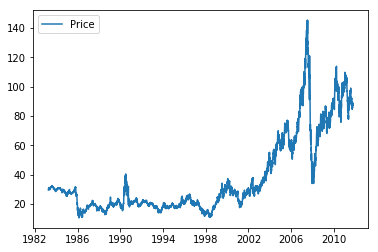

In [50]:
plt.plot(CrdOil.TimeIndex, CrdOil.Price)
plt.legend(loc='best')
pyplot.show()

# Simple Forecasts: Average and Moving Average

# AirTemp, US GDP, India GDP, Eng Daily Wage

In [51]:
temp_avg = AirTemp.copy()
temp_avg['avg_forecast'] = AirTemp['AvgTemp'].mean()

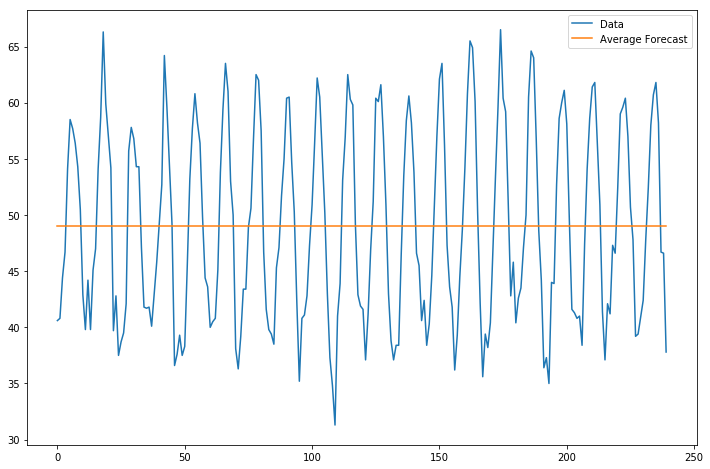

In [52]:
plt.figure(figsize=(12,8))
plt.plot(AirTemp['AvgTemp'], label='Data')
plt.plot(temp_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [53]:
mvg_avg = AirTemp.copy()
mvg_avg['moving_avg_forecast'] = AirTemp['AvgTemp'].rolling(12).mean()
#mvg_avg.head(15)
#mvg_avg.tail(6)

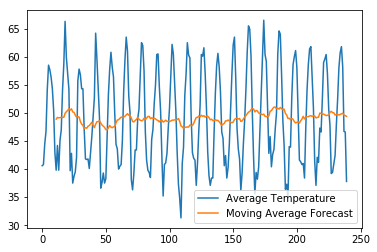

In [54]:
#plt.figure(figsize=(16,8))
plt.plot(AirTemp['AvgTemp'], label='Average Temperature')
plt.plot(mvg_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

# Task 1: MA(5) for US GDP

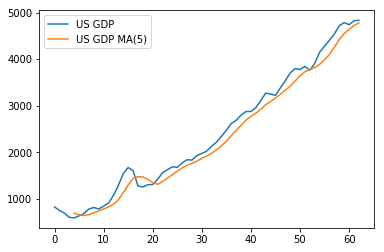

In [55]:
mvg_avg_USGDP = USGDP.copy()
mvg_avg_USGDP['moving_avg_forecast'] = USGDP['GDP'].rolling(5).mean()
plt.plot(USGDP['GDP'], label='US GDP')
plt.plot(mvg_avg_USGDP['moving_avg_forecast'], label='US GDP MA(5)')
plt.legend(loc='best')

# Task 2: MA(3) for India GDP

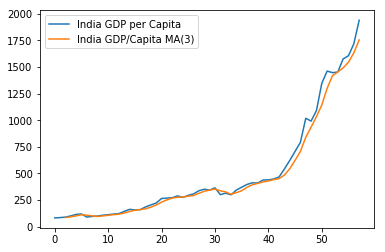

In [56]:
mvg_avg_IndiaGDP = IndiaGDP.copy()
mvg_avg_IndiaGDP['moving_avg_forecast'] = IndiaGDP['GDPpercapita'].rolling(3).mean()
plt.plot(IndiaGDP['GDPpercapita'], label='India GDP per Capita')
plt.plot(mvg_avg_IndiaGDP['moving_avg_forecast'], label='India GDP/Capita MA(3)')
plt.legend(loc='best')

In [57]:
mvg_avg_IndiaGDP.head(10)

,Year,GDPpercapita,TimeIndex,moving_avg_forecast
0,1960,81.284764,1960-12-31,NaN
1,1961,84.426437,1961-12-31,NaN
2,1962,88.914919,1962-12-31,84.875373
3,1963,100.048592,1963-12-31,91.129982
4,1964,114.315161,1964-12-31,101.092890
5,1965,118.063382,1965-12-31,110.809045
6,1966,89.053583,1966-12-31,107.144042
7,1967,95.330783,1967-12-31,100.815916
8,1968,98.831235,1968-12-31,94.405200
9,1969,106.496379,1969-12-31,100.219466


# Task 2: MA(7) for Daily Wage

In [58]:
mvg_avg_EngWage = EngWage.copy()
mvg_avg_EngWage['moving_avg_forecast'] = EngWage['DailyWage'].rolling(11).mean()
mvg_avg_EngWage.head(20)

,Year,DailyWage,TimeIndex,moving_avg_forecast
0,1950,24.27,1950-12-31,NaN
1,1951,24.17,1951-12-31,NaN
2,1952,23.76,1952-12-31,NaN
3,1953,24.17,1953-12-31,NaN
4,1954,25.18,1954-12-31,NaN
5,1955,25.74,1955-12-31,NaN
6,1956,26.19,1956-12-31,NaN
7,1957,26.68,1957-12-31,NaN
8,1958,27.05,1958-12-31,NaN
9,1959,27.59,1959-12-31,NaN


In [59]:
mvg_avg_EngWage.tail()

,Year,DailyWage,TimeIndex,moving_avg_forecast
40,1990,46.19,1990-12-31,39.789091
41,1991,46.86,1991-12-31,40.808182
42,1992,49.42,1992-12-31,42.031818
43,1993,49.51,1993-12-31,43.240909
44,1994,49.99,1994-12-31,44.400000


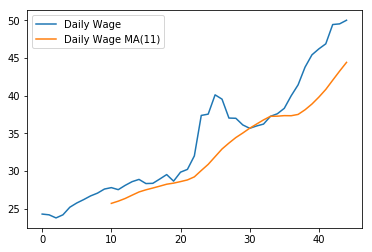

In [60]:
plt.plot(EngWage['DailyWage'], label='Daily Wage')
plt.plot(mvg_avg_EngWage['moving_avg_forecast'], label='Daily Wage MA(11)')
plt.legend(loc='best')

# MA Forecast for Crude Oil

In [61]:
mvg_avg_oil1 = CrdOil.copy()
mvg_avg_oil2 = CrdOil.copy()
mvg_avg_oil3 = CrdOil.copy()

mvg_avg_oil1['moving_avg_forecast'] = CrdOil['Price'].rolling(300).mean()
mvg_avg_oil2['moving_avg_forecast'] = CrdOil['Price'].rolling(900).mean()
mvg_avg_oil3['moving_avg_forecast'] = CrdOil['Price'].rolling(1500).mean()

mvg_avg_oil3.head()

,Date,Weekday,Price,TimeIndex,moving_avg_forecast
0,1983-04-04,2,29.44,1983-04-04,NaN
1,1983-04-05,3,29.71,1983-04-05,NaN
2,1983-04-06,4,29.92,1983-04-06,NaN
3,1983-04-07,5,30.17,1983-04-07,NaN
4,1983-04-08,6,30.38,1983-04-08,NaN


In [62]:
CrdOil.head()

,Date,Weekday,Price,TimeIndex
0,1983-04-04,2,29.44,1983-04-04
1,1983-04-05,3,29.71,1983-04-05
2,1983-04-06,4,29.92,1983-04-06
3,1983-04-07,5,30.17,1983-04-07
4,1983-04-08,6,30.38,1983-04-08


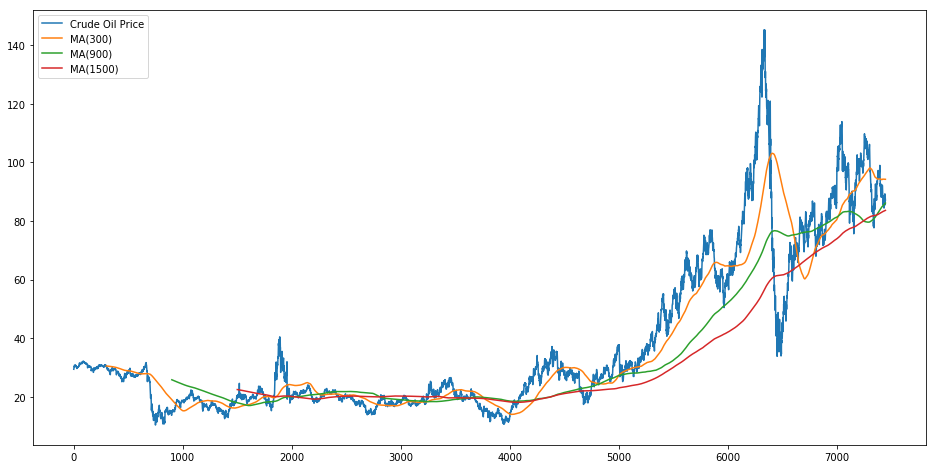

In [63]:
plt.figure(figsize=(16,8))
plt.plot(CrdOil['Price'], label='Crude Oil Price')
plt.plot(mvg_avg_oil1['moving_avg_forecast'], label='MA(300)')
plt.plot(mvg_avg_oil2['moving_avg_forecast'], label='MA(900)')
plt.plot(mvg_avg_oil3['moving_avg_forecast'], label='MA(1500)')
plt.legend(loc='upper left')

# Visualization of Seasonality: Quarterly Turnover

In [64]:
quarterly_turnover = pd.pivot_table(Turnover, values = "Turnover", columns = "Quarter", index = "Year")
quarterly_turnover

Quarter,Q1,Q2,Q3,Q4
Year,,,,
1982,NaN,NaN,13423.2,13128.8
1983,15398.8,12964.2,13133.5,13271.7
1984,15596.3,13018.0,13409.3,13304.2
1985,15873.9,13366.5,13998.6,14045.1
1986,16650.3,13598.4,14183.2,14128.5
1987,16380.7,13512.8,14022.1,14231.8
1988,16737.0,14004.5,14165.5,14203.9
1989,16895.1,14248.2,14719.5,14855.8
1990,17361.6,14585.2,14873.5,14798.4


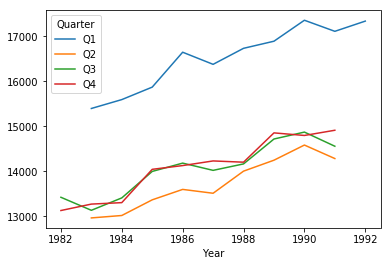

In [65]:
#plt.figure(figsize=(24,8))
quarterly_turnover.plot()

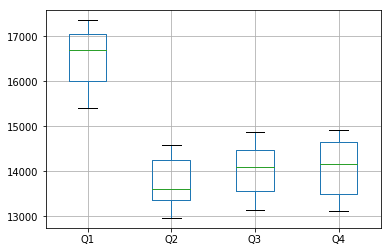

In [66]:
quarterly_turnover.boxplot()

# Task 1: Seasonality of Portugal Port

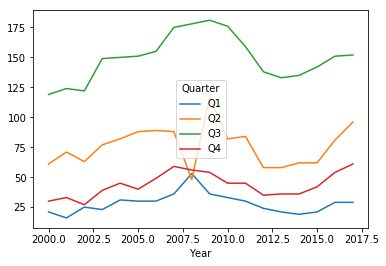

In [67]:
quarterly_portpax = pd.pivot_table(PortPax, values = "Pax", columns = "Quarter", index = "Year")
quarterly_portpax.plot()

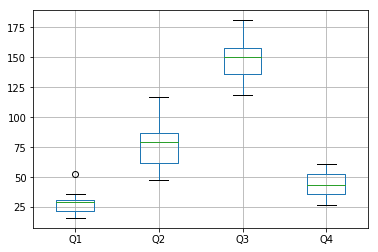

In [68]:
quarterly_portpax.boxplot()

# Task 2: Seasonality of Petrol Consumption

<Figure size 1152x576 with 0 Axes>

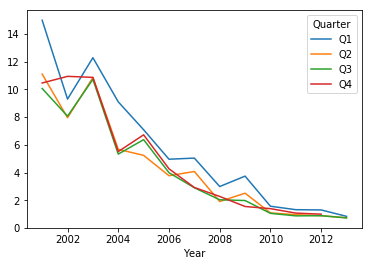

In [69]:
plt.figure(figsize=(16,8))
quarterly_petrol = pd.pivot_table(Petrol, values = "Consumption", columns = "Quarter", index = "Year")
quarterly_petrol.plot()

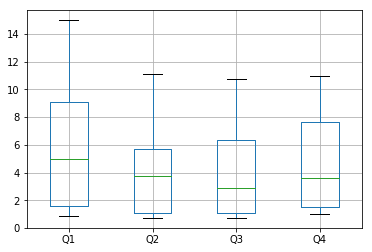

In [70]:
quarterly_petrol.boxplot()

# Visualization of Seasonality: Monthly Temperature

In [71]:
monthly_temp = pd.pivot_table(AirTemp, values = "AvgTemp", columns = "Month", index = "Year")
monthly_temp = monthly_temp[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_temp

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1920,40.6,40.8,44.4,46.7,54.1,58.5,57.7,56.4,54.3,50.5,42.9,39.8
1921,44.2,39.8,45.1,47.0,54.1,58.7,66.3,59.9,57.0,54.2,39.7,42.8
1922,37.5,38.7,39.5,42.1,55.7,57.8,56.8,54.3,54.3,47.1,41.8,41.7
1923,41.8,40.1,42.9,45.8,49.2,52.7,64.2,59.6,54.4,49.2,36.6,37.6
1924,39.3,37.5,38.3,45.5,53.2,57.7,60.8,58.2,56.4,49.8,44.4,43.6
1925,40.0,40.5,40.8,45.1,53.8,59.4,63.5,61.0,53.0,50.0,38.1,36.3
1926,39.2,43.4,43.4,48.9,50.6,56.8,62.5,62.0,57.5,46.7,41.6,39.8
1927,39.4,38.5,45.3,47.1,51.7,55.0,60.4,60.5,54.7,50.3,42.3,35.2
1928,40.8,41.1,42.8,47.3,50.9,56.4,62.2,60.5,55.4,50.2,43.0,37.3


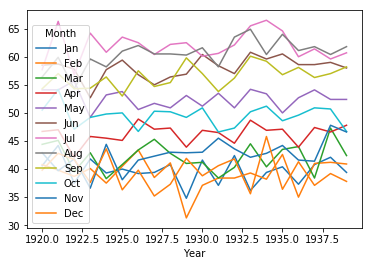

In [72]:
monthly_temp.plot()

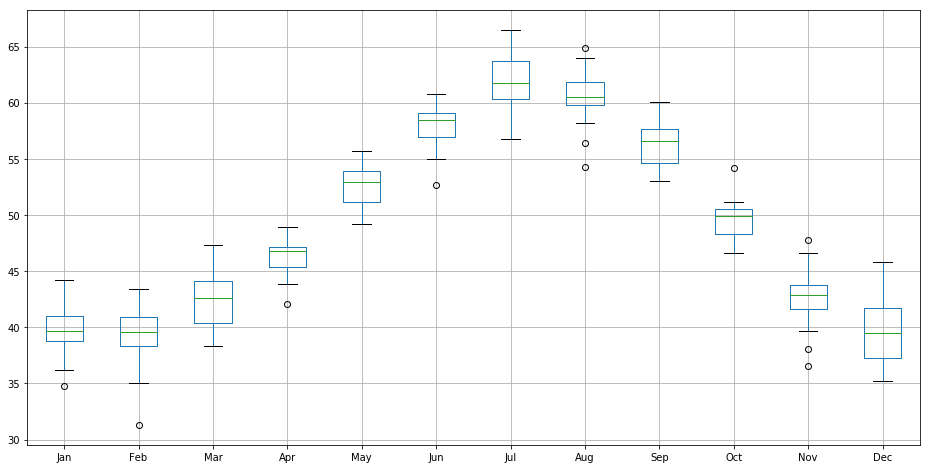

In [73]:
plt.figure(figsize=(16,8))
monthly_temp.boxplot()

# Task 3: Seasonality of Champagne Sales

In [74]:
monthly_sales = pd.pivot_table(Champ, values = "Sales", columns = "Month", index = "Year")
monthly_sales = monthly_sales[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_sales

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1964,2815.0,2672.0,2755.0,2721.0,2946.0,3036.0,2282.0,2212.0,2922.0,4301.0,5764.0,7312.0
1965,2541.0,2475.0,3031.0,3266.0,3776.0,3230.0,3028.0,1759.0,3595.0,4474.0,6838.0,8357.0
1966,3113.0,3006.0,4047.0,3523.0,3937.0,3986.0,3260.0,1573.0,3528.0,5211.0,7614.0,9254.0
1967,5375.0,3088.0,3718.0,4514.0,4520.0,4539.0,3663.0,1643.0,4739.0,5428.0,8314.0,10651.0
1968,3633.0,4292.0,4154.0,4121.0,4647.0,4753.0,3965.0,1723.0,5048.0,6922.0,9858.0,11331.0
1969,4016.0,3957.0,4510.0,4276.0,4968.0,4677.0,3523.0,1821.0,5222.0,6872.0,10803.0,13916.0
1970,2639.0,2899.0,3370.0,3740.0,2927.0,3986.0,4217.0,1738.0,5221.0,6424.0,9842.0,13076.0
1971,3934.0,3162.0,4286.0,4676.0,5010.0,4874.0,4633.0,1659.0,5951.0,6981.0,9851.0,12670.0
1972,4348.0,3564.0,4577.0,4788.0,4618.0,5312.0,4298.0,1413.0,5877.0,NaN,NaN,NaN


<Figure size 1152x576 with 0 Axes>

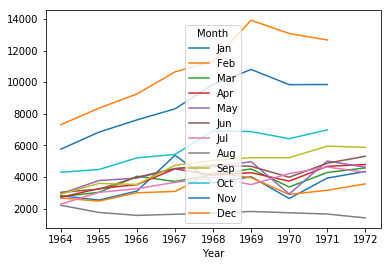

In [75]:
plt.figure(figsize=(16,8))
monthly_sales.plot()

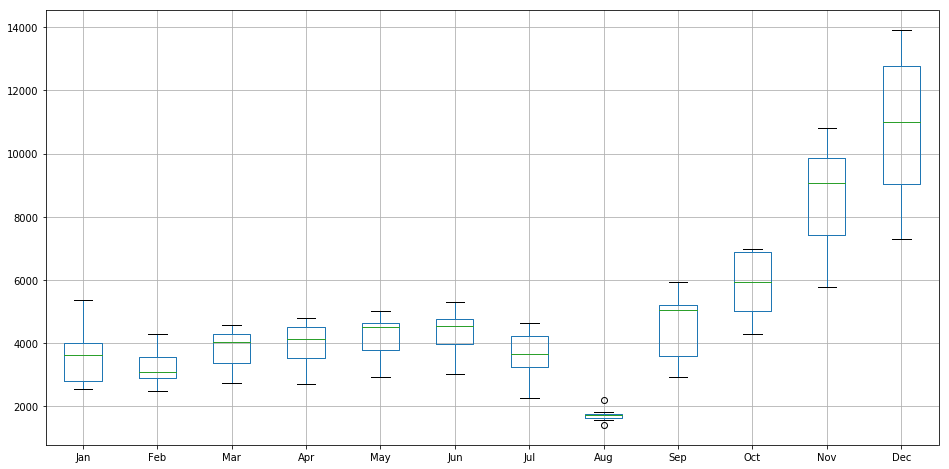

In [76]:
plt.figure(figsize=(16,8))
monthly_sales.boxplot()

# Task 4: Seasonality of Air Passengers

In [77]:
AirPax.head()

,Year,Month,Pax,TimeIndex
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [78]:
monthly_airpax = pd.pivot_table(AirPax, values = "Pax", columns = "Month", index = "Year")
monthly_airpax = monthly_airpax[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_airpax

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<Figure size 1440x576 with 0 Axes>

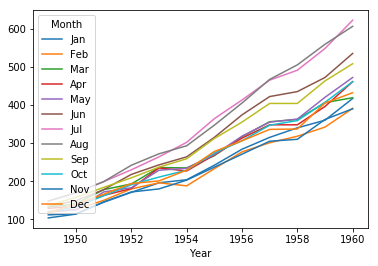

In [79]:
plt.figure(figsize=(20,8))
monthly_airpax.plot()

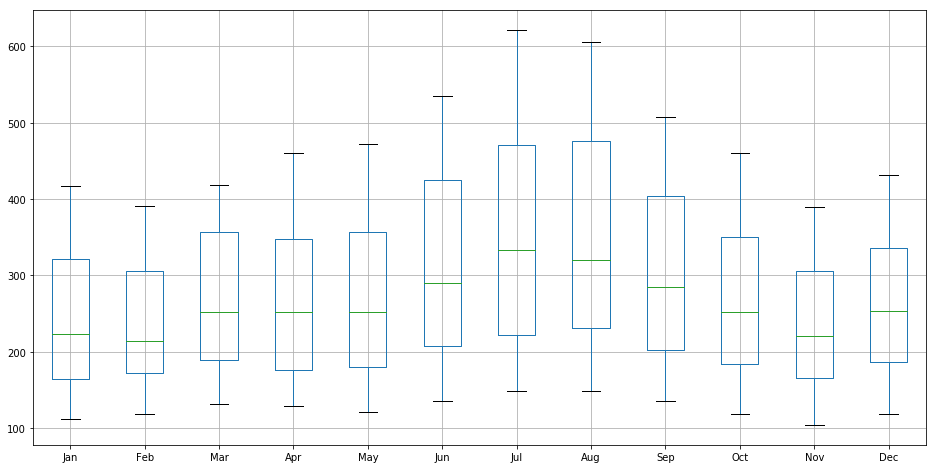

In [80]:
plt.figure(figsize=(16,8))
monthly_airpax.boxplot()

# Task 5: Seasonality of Tractor Sales

In [81]:
Tractor.head()

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


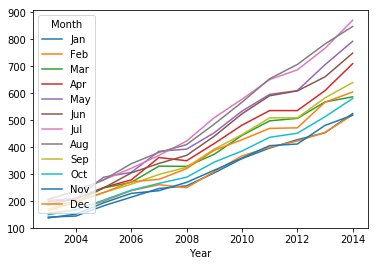

In [82]:
monthly_tractor = pd.pivot_table(Tractor, values = "Tractor-Sales", columns = "Month", index = "Year")
monthly_tractor = monthly_tractor[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_tractor.plot()

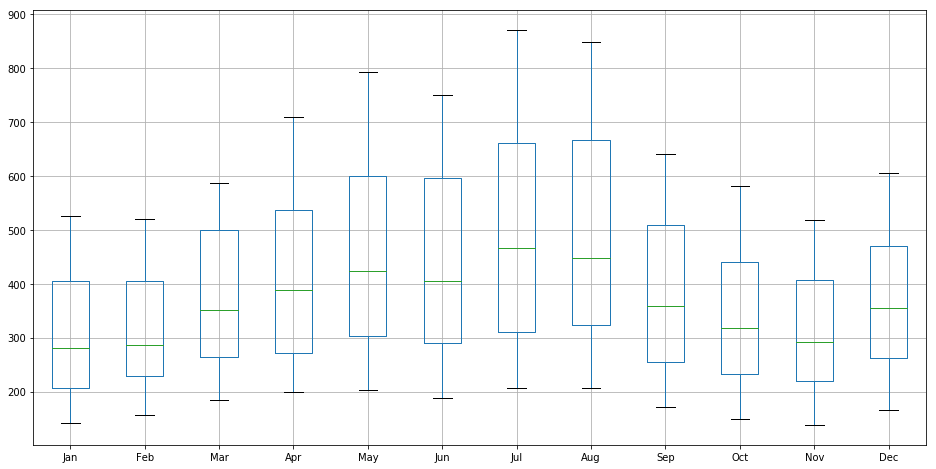

In [83]:
plt.figure(figsize=(16,8))
monthly_tractor.boxplot()

# Task 6: Seasonality of CO2 Emission

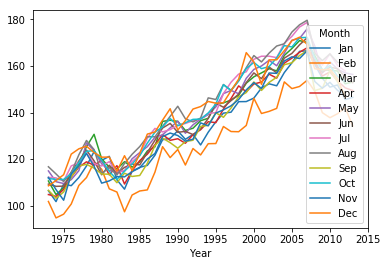

In [84]:
monthly_emission = pd.pivot_table(Emission, values = "CO2-Emission", columns = "Month", index = "Year")
monthly_emission = monthly_emission[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_emission.plot()

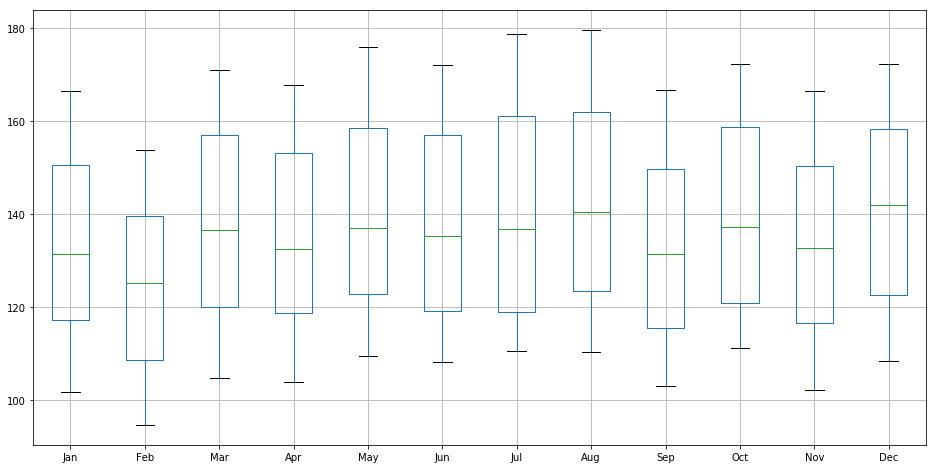

In [85]:
plt.figure(figsize=(16,8))
monthly_emission.boxplot()

# Task 7: Seasonality of Retail Food Sales

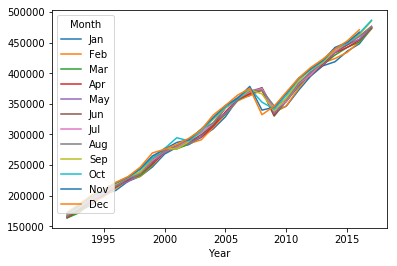

In [86]:
monthly_food = pd.pivot_table(RetailFood, values = "Food", columns = "Month", index = "Year")
monthly_food = monthly_food[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
monthly_food.plot()

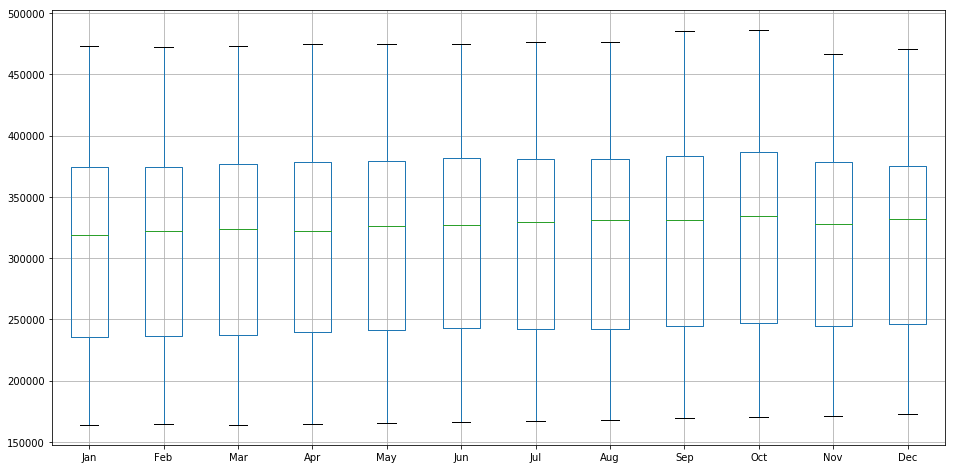

In [87]:
plt.figure(figsize=(16,8))
monthly_food.boxplot()

# Task 8: Seasonality of MaunaLoa

<Figure size 1152x576 with 0 Axes>

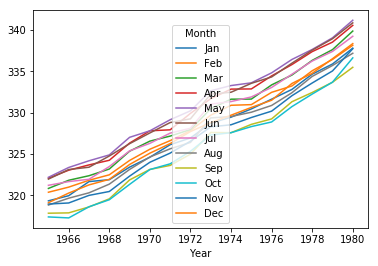

In [88]:
monthly_mauna = pd.pivot_table(MaunaLoa, values = "CO2ppm", columns = "Month", index = "Year")
monthly_mauna = monthly_mauna[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
plt.figure(figsize=(16,8))
monthly_mauna.plot()

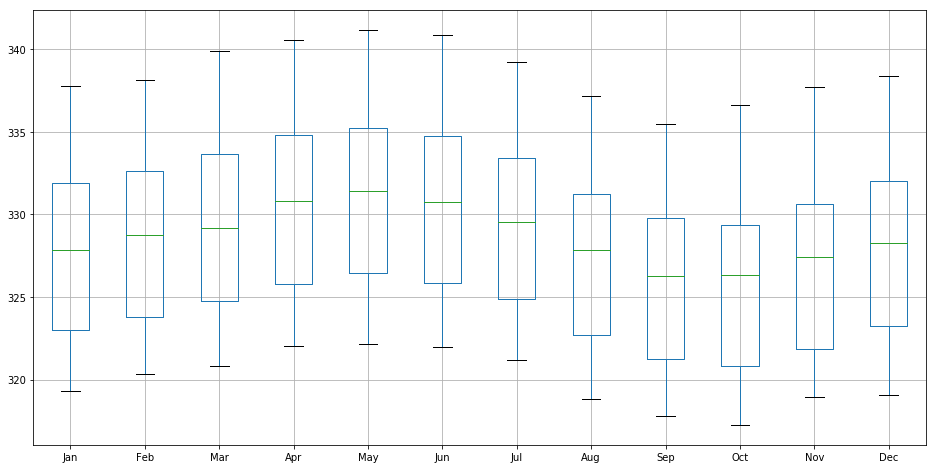

In [89]:
plt.figure(figsize=(16,8))
monthly_mauna.boxplot()

# Seasonal Decomposition

In [90]:
import statsmodels.api as sm

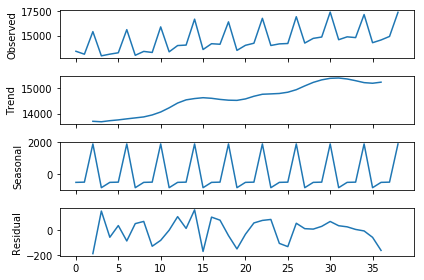

In [91]:
decompTurnover = sm.tsa.seasonal_decompose(Turnover.Turnover, model="additive", freq=4)
decompTurnover.plot()
plt.show()

In [92]:
trend = decompTurnover.trend
seasonal = decompTurnover.seasonal
residual = decompTurnover.resid

In [93]:
trend.head(12)

0            NaN
1            NaN
2     13692.5375
3     13674.1875
4     13716.7375
5     13748.1500
6     13789.3500
7     13827.8875
8     13866.6500
9     13944.9125
10    14062.1375
11    14228.4125
Name: Turnover, dtype: float64

In [94]:
seasonal.head(12)

0     -524.613498
1     -510.713672
2     1894.960113
3     -859.632943
4     -524.613498
5     -510.713672
6     1894.960113
7     -859.632943
8     -524.613498
9     -510.713672
10    1894.960113
11    -859.632943
Name: Turnover, dtype: float64

In [95]:
residual.head(12)

0            NaN
1            NaN
2    -188.697613
3     149.645443
4     -58.624002
5      34.263672
6     -88.010113
7      49.745443
8      67.263498
9    -129.998828
10    -83.197613
11     -2.279557
Name: Turnover, dtype: float64

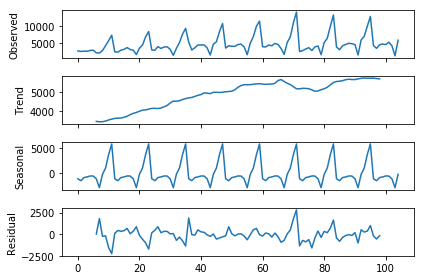

In [96]:
decompChamp = sm.tsa.seasonal_decompose(Champ.Sales, model="additive", freq=12)
decompChamp.plot()
plt.show()

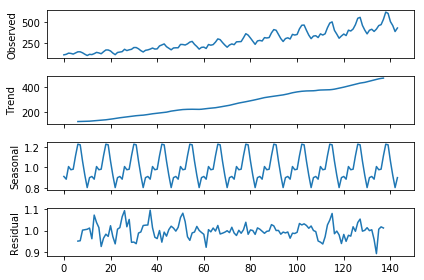

In [97]:
decompAirPax = sm.tsa.seasonal_decompose(AirPax.Pax, model="multiplicative", freq=12)
decompAirPax.plot()
plt.show()

In [98]:
seasonal = decompAirPax.seasonal
seasonal.head(24)

0     0.910230
1     0.883625
2     1.007366
3     0.975906
4     0.981378
5     1.112776
6     1.226556
7     1.219911
8     1.060492
9     0.921757
10    0.801178
11    0.898824
12    0.910230
13    0.883625
14    1.007366
15    0.975906
16    0.981378
17    1.112776
18    1.226556
19    1.219911
20    1.060492
21    0.921757
22    0.801178
23    0.898824
Name: Pax, dtype: float64

In [99]:
print(sum(seasonal[:12]))


12.0


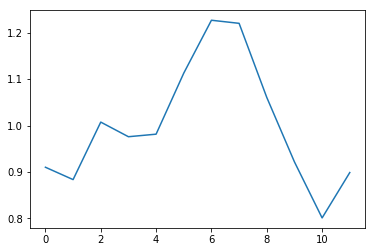

In [100]:
plt.plot(seasonal[:12])
plt.show()

# Split Data in Training and Test

In [101]:
Petrol = pd.read_csv('Petrol.csv')
Petrol.head()

,Year,Quarter,Consumption
0,2001,Q1,14.978
1,2001,Q2,11.099
2,2001,Q3,10.057
3,2001,Q4,10.454
4,2002,Q1,9.295


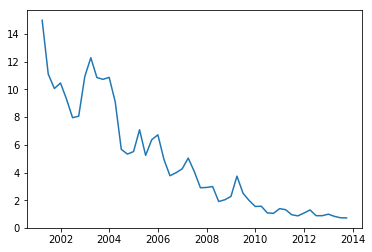

In [102]:
date_rng = pd.date_range(start='1/1/2001', end='30/9/2013', freq='Q')
date_rng
Petrol['TimeIndex'] = pd.DataFrame(date_rng, columns=['Quarter'])
Petrol.head()
plt.plot(Petrol.TimeIndex, Petrol.Consumption)
pyplot.show()

In [103]:
#Creating train and test set 
train=Petrol[0:int(len(Petrol)*0.7)] 
test=Petrol[int(len(Petrol)*0.7):]

In [104]:
type(train)
train.head()

,Year,Quarter,Consumption,TimeIndex
0,2001,Q1,14.978,2001-03-31
1,2001,Q2,11.099,2001-06-30
2,2001,Q3,10.057,2001-09-30
3,2001,Q4,10.454,2001-12-31
4,2002,Q1,9.295,2002-03-31


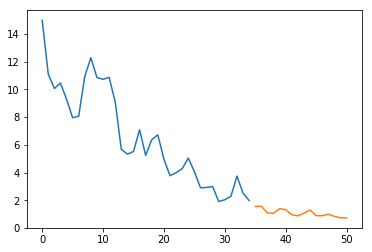

In [105]:
plt.plot(train.Consumption)
plt.plot(test.Consumption)
pyplot.show()

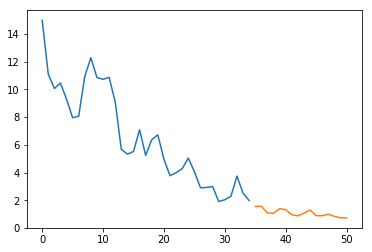

In [106]:
train.Consumption.plot()
test.Consumption.plot()

# Simple Exponential Smoothing

In [107]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [108]:
# create class
model = SimpleExpSmoothing(np.asarray(train['Consumption']))

In [109]:
# fit model
model99_fit = model.fit(smoothing_level=0.99,optimized=False)
model5_fit = model.fit(smoothing_level=0.5,optimized=False)
model1_fit = model.fit(smoothing_level=0.1,optimized=False)

In [110]:
fcst_SES = test.copy()

In [111]:
fcst_SES['SES99'] = model99_fit.forecast(len(test['Consumption']))
fcst_SES['SES5'] = model5_fit.forecast(len(test['Consumption']))
fcst_SES['SES1'] = model1_fit.forecast(len(test['Consumption']))

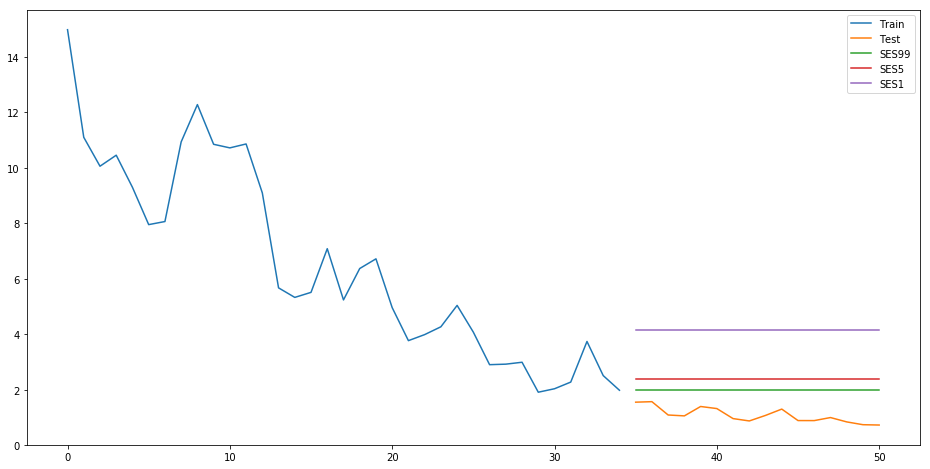

In [112]:
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(fcst_SES['SES99'], label='SES99')
plt.plot(fcst_SES['SES5'], label='SES5')
plt.plot(fcst_SES['SES1'], label='SES1')
plt.legend(loc='best')

In [113]:
fcst_SES['SES99']

35    1.986998
36    1.986998
37    1.986998
38    1.986998
39    1.986998
40    1.986998
41    1.986998
42    1.986998
43    1.986998
44    1.986998
45    1.986998
46    1.986998
47    1.986998
48    1.986998
49    1.986998
50    1.986998
Name: SES99, dtype: float64

In [114]:
#


In [115]:
mean_absolute_percentage_error(test['Consumption'],fcst_SES['SES99'])

94.50460480680182

In [116]:
rmse = sqrt(mean_squared_error(test['Consumption'],fcst_SES['SES99']))
rmse

0.9437879263674692

In [117]:
model_opt_fit = model.fit()

In [118]:
model_opt_fit.model.params

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 14.978,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [119]:
model_opt_fit.fittedvalues

array([14.978  , 14.978  , 11.099  , 10.057  , 10.454  ,  9.295  ,
        7.952  ,  8.063  , 10.933  , 12.278  , 10.847  , 10.718  ,
       10.859  ,  9.09425,  5.67257,  5.32862,  5.51024,  7.08428,
        5.23772,  6.36947,  6.71848,  4.95971,  3.76986,  3.9876 ,
        4.2695 ,  5.04027,  4.07531,  2.90378,  2.92244,  2.9911 ,
        1.91147,  2.03605,  2.27635,  3.74029,  2.51021])

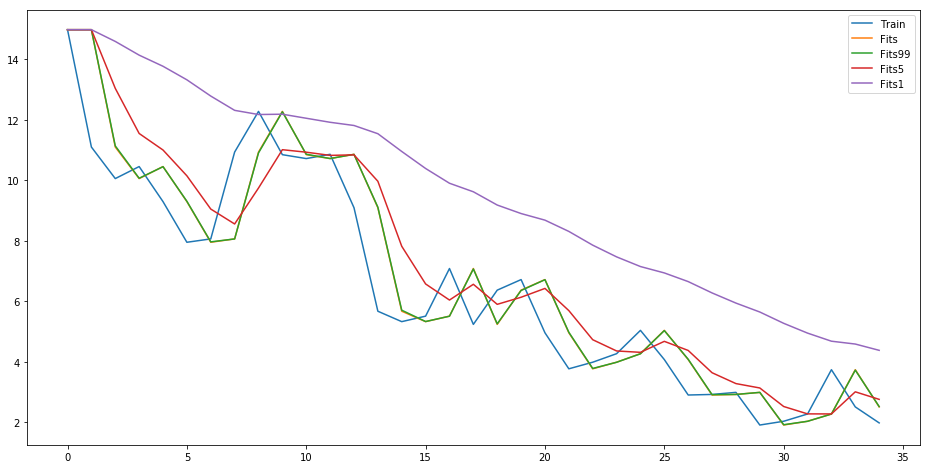

In [120]:
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(model_opt_fit.fittedvalues, label='Fits')
plt.plot(model99_fit.fittedvalues, label='Fits99')
plt.plot(model5_fit.fittedvalues, label='Fits5')
plt.plot(model1_fit.fittedvalues, label='Fits1')
plt.legend(loc='best')

# Double Exponential (Holt)

In [121]:
model = Holt(np.asarray(train['Consumption']))
model81_fit = model.fit(smoothing_level = 0.8,smoothing_slope = 0.1,optimized=False)

In [122]:
model93_fit = model.fit(smoothing_level = 0.9,smoothing_slope = 0.3,optimized=False)

In [123]:
fcst_Holt = test.copy()

In [124]:
fcst_Holt['Holt81'] = model81_fit.forecast(len(test['Consumption']))
fcst_Holt['Holt93'] = model93_fit.forecast(len(test['Consumption']))

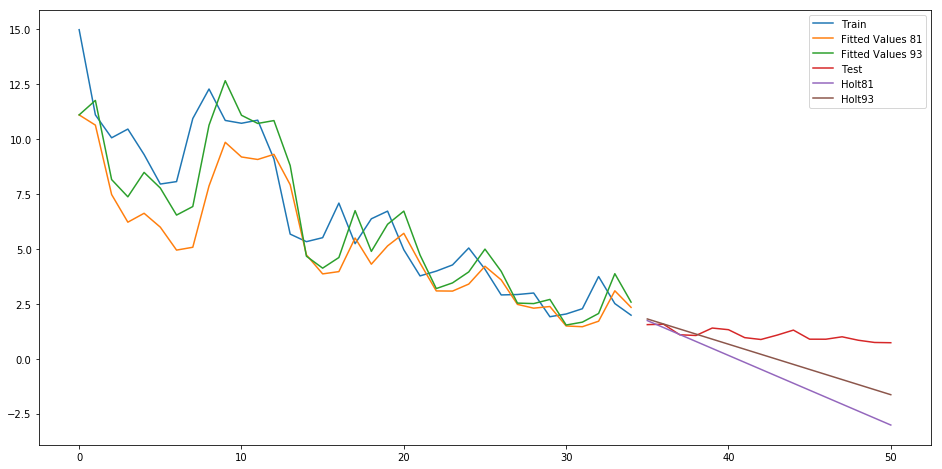

In [125]:
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(model81_fit.fittedvalues, label='Fitted Values 81')
plt.plot(model93_fit.fittedvalues, label='Fitted Values 93')
plt.plot(test['Consumption'], label='Test')
plt.plot(fcst_Holt['Holt81'], label='Holt81')
plt.plot(fcst_Holt['Holt93'], label='Holt93')
plt.legend(loc='best')

In [126]:
modelopt_fit = model.fit()

In [127]:
fcst_Holt['Opt'] = modelopt_fit.forecast(len(test['Consumption']))

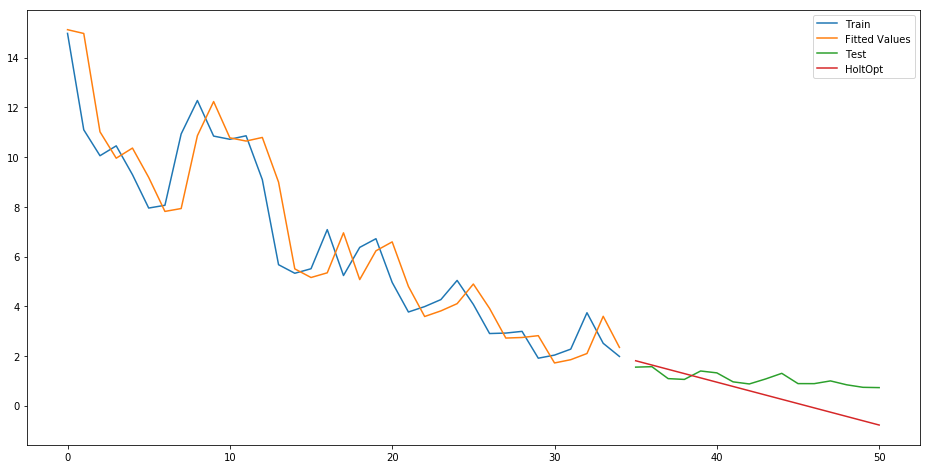

In [128]:
plt.figure(figsize=(16,8))
plt.plot(train['Consumption'], label='Train')
plt.plot(modelopt_fit.fittedvalues, label='Fitted Values')
plt.plot(test['Consumption'], label='Test')
plt.plot(fcst_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')

In [129]:
modelopt_fit.model.params

{'smoothing_level': 1.0,
 'smoothing_slope': 0.019969001307085045,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 15.127123152052901,
 'initial_slope': 0.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [130]:
#Creating train and test set 
#trainPax=AirPax[0:int(len(AirPax)*0.8)] 
#testPax=AirPax[int(len(AirPax)*0.8):]


# Fitting Holt-Winters Model

In [131]:
trainPax=AirPax[0:119] 
testPax=AirPax[119:]
trainPax.head()

,Year,Month,Pax,TimeIndex
0,1949,Jan,112,1949-01-31
1,1949,Feb,118,1949-02-28
2,1949,Mar,132,1949-03-31
3,1949,Apr,129,1949-04-30
4,1949,May,121,1949-05-31


In [132]:
model1_fit=ExponentialSmoothing(np.asarray(trainPax['Pax']), seasonal_periods=12 ,seasonal='add').fit(optimized=True)

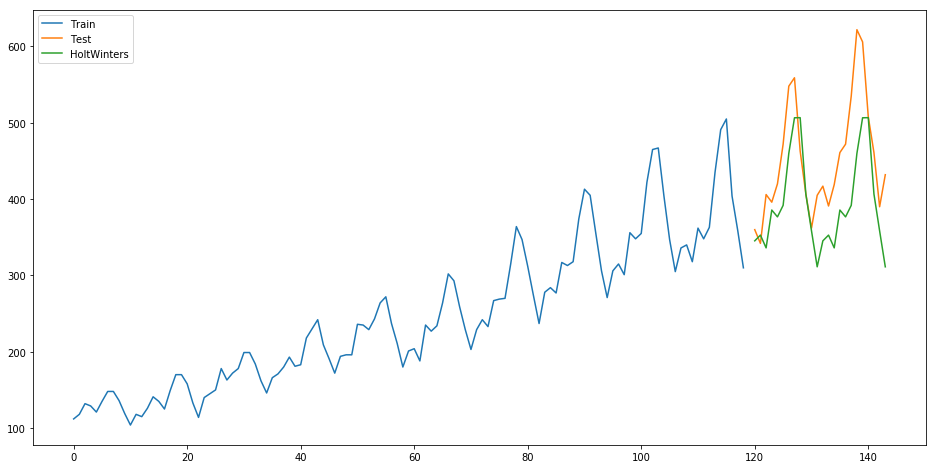

In [133]:
fcst_HoltW = testPax.copy()
fcst_HoltW['HoltW'] = model1_fit.forecast(len(testPax['Pax']))
plt.figure(figsize=(16,8))
plt.plot(trainPax['Pax'], label='Train')
plt.plot(testPax['Pax'], label='Test')
plt.plot(fcst_HoltW['HoltW'], label='HoltWinters')
plt.legend(loc='best')

In [134]:
model2_fit = ExponentialSmoothing(np.asarray(trainPax['Pax']),  seasonal_periods=12, trend='add',seasonal='mul').fit(smoothing_slope = 0.2, smoothing_seasonal=0.8, smoothing_level = 0.2, optimized=False)

In [135]:
model2opt_fit = ExponentialSmoothing(np.asarray(trainPax['Pax']),  seasonal_periods=12, trend='add',seasonal='mul').fit(optimized=True)

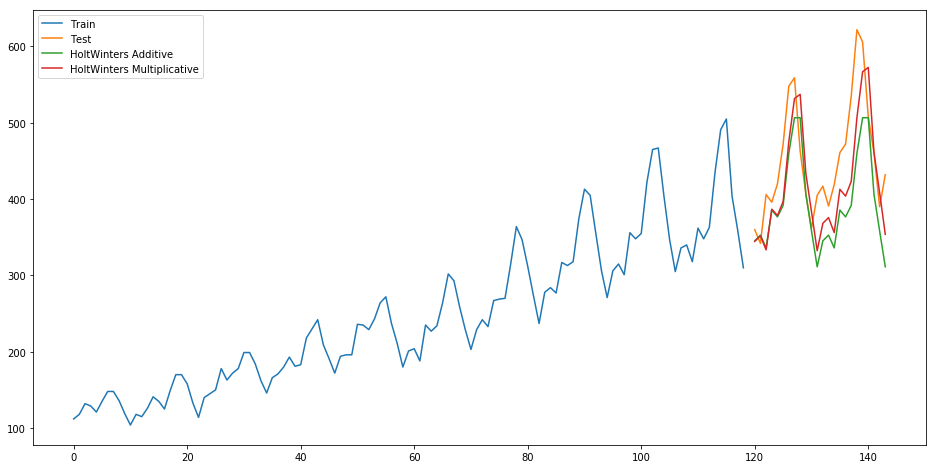

In [136]:
fcst_HoltW['HoltWM'] = model2opt_fit.forecast(len(testPax['Pax']))
plt.figure(figsize=(16,8))
plt.plot(trainPax['Pax'], label='Train')
plt.plot(testPax['Pax'], label='Test')
plt.plot(fcst_HoltW['HoltW'], label='HoltWinters Additive')
plt.plot(fcst_HoltW['HoltWM'], label='HoltWinters Multiplicative')
plt.legend(loc='best')

In [137]:
model1_fit.model.params

{'smoothing_level': 0.31578947140354213,
 'smoothing_slope': 0.0,
 'smoothing_seasonal': 0.684210524035121,
 'damping_slope': nan,
 'initial_level': 205.65011912291803,
 'initial_slope': nan,
 'initial_seasons': array([ -97.28588328,  -91.12951034,  -78.09265942,  -83.04806758,
         -91.57167435,  -77.43088272,  -64.84999206,  -66.67767077,
         -80.16060127,  -98.23039371, -112.12971854,  -94.94963782]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [138]:
model2opt_fit.model.params

{'smoothing_level': 0.3157894736842105,
 'smoothing_slope': 0.05263128979733625,
 'smoothing_seasonal': 0.6842105263157894,
 'damping_slope': nan,
 'initial_level': 212.39983619554351,
 'initial_slope': 1.0836376929361113,
 'initial_seasons': array([0.55130275, 0.57518895, 0.62988469, 0.60244665, 0.5578822 ,
        0.6209469 , 0.68380192, 0.68140581, 0.62361433, 0.54218973,
        0.47840128, 0.55888027]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [139]:
mean_absolute_percentage_error(testPax['Pax'],fcst_HoltW['HoltWM'])

10.616548604339204

# Fitting HW Model to MaunaLoa

In [140]:
trainMaunaLoa=MaunaLoa[0:160]
testMaunaLoa=MaunaLoa[160:]
trainMaunaLoa.head()

,Year,Month,CO2ppm,TimeIndex
0,1965,Jan,319.32,1965-01-31
1,1965,Feb,320.36,1965-02-28
2,1965,Mar,320.82,1965-03-31
3,1965,Apr,322.06,1965-04-30
4,1965,May,322.17,1965-05-31


In [141]:
modelA_fit = ExponentialSmoothing(np.asarray(trainPax['Pax']),  seasonal_periods=12, trend='add',seasonal='mul').fit(smoothing_slope = 0.2, smoothing_seasonal=0.8, smoothing_level = 0.2, optimized=False)